A company has been testing out different ad configurations on YouTube videos. They have tried modifying the position of the ad within the video, the length of the ad, the location of the call-to-action button linking to their website, the color of the ad background, the background music, and the category of video the ad is placed on.

They have compiled a collection of various experiments with the corresponding number of conversions, or visits to their website resulting from each ad, in the 'youtube_ad_data.csv' file.


For the following questions, write out the appropriate hypothesis test, calculate the test statistic and signficance, report the power and effect size of the test, run an ad-hoc test if applicable, and write a summary of the results.

- 1) Do ads placed on gaming videos lead to higher conversion on average?

- 2) Is the conversion rate different for ads that are very short versus ads that are long?

- 3) Does it matter what background music is included in an ad?

- 4) Is the conversion rate for ads placed at the beginning, middle, or end of a video different depending on where the call-to-action button is place?

## Import the librabies and the dataframe needed to complete the problem and Cohen's D formula for effect size, if needed.

In [17]:
import pandas as pd
from scipy import stats
import scipy.stats as stats
import numpy as np
from numpy import mean, sqrt, std
from statsmodels.stats.power import tt_ind_solve_power
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [2]:
def cohens_d_one_samp(x, mu0):
    return (x.mean() - mu0) / x.std()
def cohens_d_two_samp(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx+ny - 2
    return (np.abs(mean(x)-mean(y))/sqrt(((nx-1)*std(x,ddof=1)**2+(ny-1)*std(y,ddof=1)**2)/dof))

In [3]:
youtube_data = pd.read_csv('youtube_ad_data.csv')
youtube_data.head()

,Conversion,Video_Location,Duration,Button_Location,Background_Color,Video_Type,Background_Music
0,183,beginning,short,lower-right,black,beauty,none
1,67,end,long,lower-left,green,beauty,classical
2,154,beginning,medium,middle,red,news,none
3,168,middle,short,upper-left,black,gaming,none
4,188,middle,short,upper-left,orange,beauty,hip hop


## Question 1: 
___
Do ads placed on gaming videos lead to higher conversion on average?

### Hypothesis:
- H0: mu_gaming = mu_conversion (they are the same - no difference)
- Ha: mu_gaming != mu_conversion (they are not equal - there is a difference)

**Note: when comparing the youtube_data, the gaming has to be excluded from the data, in order to compare them accurately.**

In [4]:
df_gaming = youtube_data[youtube_data['Video_Type']=='gaming']
df_youtube = youtube_data[youtube_data['Video_Type']!='gaming']

In [5]:
t, p = stats.ttest_ind(df_youtube['Conversion'], df_gaming['Conversion'])
t, p

(-0.09400640152474109, 0.9252960042421554)

### Conclusion
___
The p-value is greater than 0.05 in this case, so we fail to reject the null.  Therefore, placing ads on gaming videos yields no significant differences on conversion.

## Question 2:
___
Is the conversion rate different for ads that are very short versus ads that long?

### Hypothesis:
- H0: mu_very_short = mu_long (they are the same -- no difference)
- Ha: mu_very_short != mu_long (they are not equal -- there is a difference)

In [6]:
df_very_short = youtube_data[youtube_data['Duration']=='very short']
df_long = youtube_data[youtube_data['Duration']=='long']

In [7]:
t, p = stats.ttest_ind(df_very_short['Conversion'], df_long['Conversion'])
t, p

(1.0440666138914314, 0.3013783087267185)

### Conclusion
___
The p-value is greater than 0.05 in this case, so we fail to reject the null.  The data does not support that the conversion rates are different.

## Question 3:
___
Does it matter what background music is included in an ad?

### Hypothesis:
- H0: mu_classical = mu_dance = mu_hip_hop
- Ha: at least one is different

In [4]:
sm.stats.anova_lm(ols('Conversion ~ Background_Music', data=youtube_data).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Background_Music,3.0,83032.251675,27677.417225,6.132895,0.000734
Residual,96.0,433242.738325,4512.945191,NaN,NaN


In [ ]:
conversion_samp = youtube_data[]

In [5]:
tukey_results = pairwise_tukeyhsd(youtube_data['Conversion'], youtube_data['Background_Music'])
tukey_results.summary()

group1,group2,meandiff,lower,upper,reject
classical,dance,77.8325,27.9903,127.6748,True
classical,hip hop,59.063,7.2414,110.8845,True
classical,none,44.1963,-2.4002,90.7928,False
dance,hip hop,-18.7696,-72.4744,34.9353,False
dance,none,-33.6362,-82.3186,15.0461,False
hip hop,none,-14.8667,-65.5736,35.8403,False


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


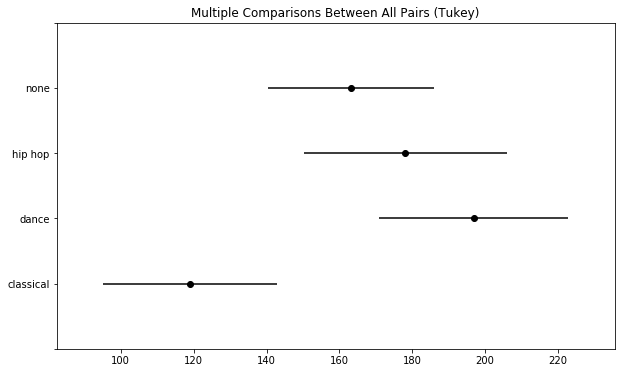

In [8]:
tukey_results.plot_simultaneous().show()

### Conclusion:
___
Since we are comparing more than 2 things, we want to make sure that we use ANOVA testing to find the p-value.  Once we found the p-value, it resulted in rejecting the null hypothesis, because it showed a significant difference(lower than our alpha).  In order to find where that difference was Tukey HSD is used.  Looking at those results, it's important to note that the background music does matter.  It shows that classical music gives a lower conversion rate, so it would be best to avoid classical music in the ad.

## Question 4:
___
Is the conversion rate for ads placed at the beginning, middle, or end of a video different depending on where the call-to-action button is place?

### Hypothesis:
- H0: mu_beginning = mu_middle = mu_end 
- Ha: at least one is different

In [11]:
sm.stats.anova_lm(ols('Conversion ~ Button_Location*Video_Location', data=youtube_data).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Button_Location,4.0,96933.530828,24233.382707,7.790719,2.130166e-05
Video_Location,2.0,102786.580150,51393.290075,16.522277,8.676633e-07
Button_Location:Video_Location,8.0,52158.534505,6519.816813,2.096037,4.486467e-02
Residual,85.0,264396.344517,3110.545230,NaN,NaN


In [12]:
tukey_results1 = pairwise_tukeyhsd(youtube_data['Conversion'], youtube_data['Button_Location']+youtube_data['Video_Location'])
tukey_results1.summary()

group1,group2,meandiff,lower,upper,reject
lower-leftbeginning,lower-leftend,-22.6667,-123.2744,77.9411,False
lower-leftbeginning,lower-leftmiddle,9.3889,-80.1275,98.9053,False
lower-leftbeginning,lower-rightbeginning,82.7,-24.0106,189.4106,False
lower-leftbeginning,lower-rightend,64.5,-63.7502,192.7502,False
lower-leftbeginning,lower-rightmiddle,134.25,18.9894,249.5106,True
lower-leftbeginning,middlebeginning,-11.3571,-107.3685,84.6542,False
lower-leftbeginning,middleend,-16.1,-103.2288,71.0288,False
lower-leftbeginning,middlemiddle,134.5,33.8923,235.1077,True
lower-leftbeginning,upper-leftbeginning,-1.5833,-85.0028,81.8362,False
lower-leftbeginning,upper-leftend,20.7,-86.0106,127.4106,False


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


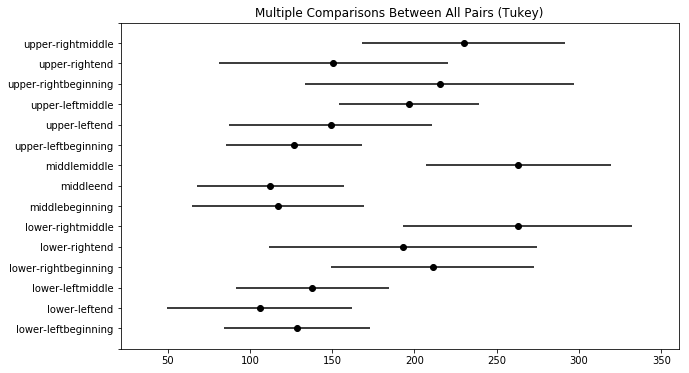

In [13]:
tukey_results1.plot_simultaneous().show()

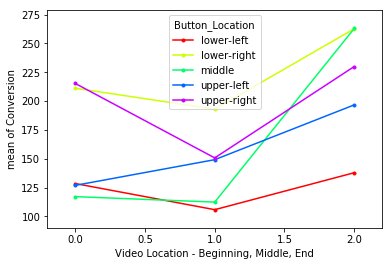

In [18]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(response=youtube_data['Conversion'], trace=youtube_data['Button_Location'], x=youtube_data['Video_Location'].astype('category').cat.codes)
plt.xlabel('Video Location - Beginning, Middle, End')
plt.show()

### Conclusion:
___
Comparing the button location with the video location, the ANOVA test showed to have a significant difference because the p-value was less than our alpha, therefore we can reject the null hypothesis.  To find where the differences lie, I used the Tukey HSD.  Looking at the graph still showed alot of intersection between the pairs, so I used an interaction plot to further see the comparsion.

Looking at the interaction plot, the x-axis is the video location where 0 is Beginning, 1 is Middle, and 2 is End.  The y-axis represents the mean of conversion.  The interaction plot shows that the lower-right button position yields the highest conversion, with the end giving a better outcome.  It also shows that the middle button as low conversion rates at the beginning and middle, but much a much higher conversion for the end.  